In [27]:
using Plots, Distributions

In [90]:
# Total machines
N = 1000;

# Working machines at day 0
W_0 = 990;

# maintainance -> probability of breaking
Pb1 = 0.001;
Pb0 = 0.4;
Pb(m) = Pb1*m + Pb0*(1-m);

# probability of being repaired
Pr = 0.5;

# Gross profit
I(m) = 0.6*m + 1*(1-m);

# Cost of repair
C = 4;

function simulate(m, iterations, W_0)
    W = W_0
    M = 0
    for _ in 1:365
        B = rand(Binomial(W, Pb(m)));
        R = rand(Binomial(N-W, Pr));
        W = W - B + R;
        # Operating profit = Gross profit - Expenses (cost of repairs)
        M = W*I(m) - R*C
    end
    
    return M
end
xs = collect(0:1e-2:1);

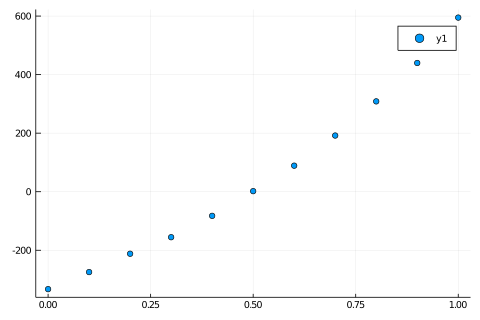

In [97]:
scatter(collect(0:1e-1:1), x -> mean(simulate(x, -42, W_0)[end] for _ in 1:100), dpi=20)
# plot(mean(simulate(0.5, -42, W_0) for _ in 1:100), dpi=20)

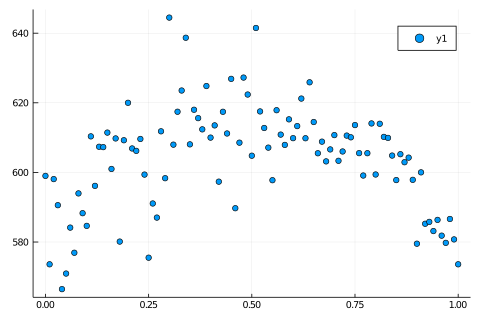

In [77]:
scatter(xs, x -> simulate(x, 100, W_0)[1], dpi=20)